Lesson 8

---

# 🧑‍🍳 LangChain: Pandas Tool


In [1]:
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [2]:
import pandas as pd
from langchain.llms import OpenAI

df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [4]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows
Action: python_repl_ast
Action Input: len(df)
Observation: 418
Thought: I now know the final answer
Final Answer: There are 418 rows.

> Finished chain.


'There are 418 rows.'

In [5]:
agent.run("how many people have survived")



> Entering new AgentExecutor chain...
Thought: I need to count the number of people who have survived
Action: python_repl_ast
Action Input: df['Survived'].sum()
Observation: 152
Thought: I now know the final answer
Final Answer: 152 people have survived.

> Finished chain.


'152 people have survived.'

In [6]:
len(df[df["Survived"]==1])

152

In [7]:
question = "how many people have survived by class"
response = agent.run(question)

print("----- RESULT -----")
print(response)




> Entering new AgentExecutor chain...
Thought: I need to count the number of people who have survived in each class
Action: python_repl_ast
Action Input: df.groupby('Pclass')['Survived'].sum()
Observation: Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64
Thought: I now know the final answer
Final Answer: 50 people have survived in class 1, 30 people have survived in class 2, and 72 people have survived in class 3.

> Finished chain.
----- RESULT -----
50 people have survived in class 1, 30 people have survived in class 2, and 72 people have survived in class 3.


In [14]:
model="gpt-3.5-turbo"
llm = ChatOpenAI(temperature=0.0, model=model)
from langchain.prompts import ChatPromptTemplate

from env_colors import TerminalTextColor

prompt_template = ChatPromptTemplate.from_template("""based on question and its response generate a output code to fullfil a matplotlib chart according to the data returned.

Remember to add a label for each category containing the number (counting, sum etc.) QUESTION ```{question}```, RESPONSE: ```{response}```""")
print(prompt_template)

messages = prompt_template.format_messages(question=question, response=response)
chat = ChatOpenAI(temperature=0.0, model=model)
final_response = chat(messages)

print(f"{TerminalTextColor.BLUE}----- RESPONSE ------{TerminalTextColor.RESET}")

print(final_response.content)

input_variables=['question', 'response'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'response'], template='based on question and its response generate a output code to fullfil a matplotlib chart according to the data returned.\n\nRemember to add a label for each category containing the number (counting, sum etc.) QUESTION ```{question}```, RESPONSE: ```{response}```'))]
----- RESPONSE ------
import matplotlib.pyplot as plt

# Data
classes = ['Class 1', 'Class 2', 'Class 3']
survived = [50, 30, 72]

# Plotting the chart
plt.bar(classes, survived)

# Adding labels to each bar
for i in range(len(classes)):
    plt.text(i, survived[i], str(survived[i]), ha='center', va='bottom')

# Adding title and labels
plt.title('Survivors by Class')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')

# Displaying the chart
plt.show()


50 people have survived in class 1, 30 people have survived in class 2, and 72 people have survived in class 3.


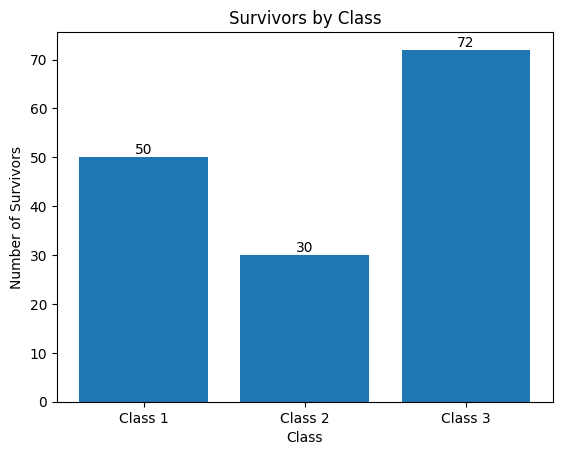

In [15]:
print(response)
exec(final_response.content)

In [10]:
df[df["Survived"]==1].groupby(["Pclass"], as_index=False).agg(
    survived_by_class = ("Survived" , "count")
)

,Pclass,survived_by_class
0,1,50
1,2,30
2,3,72


In [11]:
agent.run("How many women survived by class?")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include women and then group by class
Action: python_repl_ast
Action Input: df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].sum()
Observation: Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64
Thought: I now know the final answer
Final Answer: 50 women survived in class 1, 30 women survived in class 2, and 72 women survived in class 3.

> Finished chain.


'50 women survived in class 1, 30 women survived in class 2, and 72 women survived in class 3.'

In [12]:
df.groupby([ "Sex","Pclass",], as_index=False).agg(
    survived_by_class = ("Survived" , "sum")
)

,Sex,Pclass,survived_by_class
0,female,1,50
1,female,2,30
2,female,3,72
3,male,1,0
4,male,2,0
5,male,3,0


In [13]:
agent.run("could you create a Exploratory Data Analysis of column Class as a category")



> Entering new AgentExecutor chain...
Thought: I need to get the unique values of the column
Action: python_repl_ast
Action Input: df['Pclass'].unique()
Observation: [3 2 1]
Thought: I need to get the count of each unique value
Action: python_repl_ast
Action Input: df['Pclass'].value_counts()
Observation: Pclass
3    218
1    107
2     93
Name: count, dtype: int64
Thought: I now know the final answer
Final Answer: The Exploratory Data Analysis of column Class as a category is that there are 218 passengers in class 3, 107 passengers in class 1, and 93 passengers in class 2.

> Finished chain.


'The Exploratory Data Analysis of column Class as a category is that there are 218 passengers in class 3, 107 passengers in class 1, and 93 passengers in class 2.'